### Bonanzaa-LTER Gradient Soil Data File Merge

In [1]:

import numpy as np
import pandas as pd 
import datetime as dt

List of urls for EML Thaw Gradient Sites from 2004-2018

DOI: http://dx.doi.org/10.6073/pasta/29d79cf984929bc247173268c3785eca
Soil Temperature data measured at depths (10,20,30 and 40cm) in soil at the Eight Mile Lake (EML) permafrost thaw gradient site.This script is designed to read in, standardize and merge individual files into one final csv file containing all years (2004-2018). Drop all the rows with NaNs. Check the resultion of the measurement (if you see below it switches from every 2 hour to 30mins). Note: once you drop the rows make sure that shape of the array reduced \ 5.Apply FFT (fast furier trasform analyze the spikes times)

In [2]:
urls=["https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2004_2007.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2010_2013.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2013_2014.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2014_2015.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2015_2016.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2016_2017.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2017_2018.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2004_2009.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2010_2013.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2013_2014.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2014_2015.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2015_2016.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2016_2017.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2017_2018.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2004.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2008_2009.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2010_2013.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2013_2014.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2014_2015.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2016_2017.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2017_2018.csv"]

First read in each csv from the list above, call in each column name, and specify Na-values (-9999, NaN). This takes a moment to run since the datafiles are half hourly

In [4]:
dflist=[]
for i in range(len(urls)):
    df=pd.read_csv(urls[i]
          ,skiprows=1
        #index_col='date'
            ,sep=","  
           , names=[
                    "site",     
                    "date",     
                    "year",     
                    "doy",     
                    "hour",     
                    "loc1_5cm",     
                    "loc1_10_cm",     
                    "loc1_20_cm",     
                    "loc1_30cm",     
                    "loc1_40cm",     
                    "empty1",     
                    "loc2_5cm",     
                    "loc2_10cm",     
                    "loc2_20cm",     
                    "loc2_30cm",     
                    "loc2_40cm",     
                    "empty2",     
                    "loc3_5cm",     
                    "loc3_10cm",     
                    "loc3_20cm",     
                    "loc3_30cm",     
                    "loc3_40cm"    ]
,na_values={
                  'loc1_5cm':[
                          '-9999',],
                  'loc1_10_cm':[
                          '-9999',],
                  'loc1_20_cm':[
                          '-9999',],
                  'loc1_30cm':[
                          '-9999',],
                  'loc1_40cm':[
                          '-9999',],
                  'loc2_5cm':[
                          '-9999',],
                  'loc2_10cm':[
                          '-9999',],
                  'loc2_20cm':[
                          '-9999',],
                  'loc2_30cm':[
                          '-9999',],
                  'loc2_40cm':[
                          '-9999',],
                  'loc3_5cm':[
                          '-9999',],
                  'loc3_10cm':[
                          '-9999',],
                  'loc3_20cm':[
                          '-9999',],
                  'loc3_30cm':[
                          '-9999',],
                  'loc3_40cm':[
                          '-9999',],} 
            
    )
    dflist.append(df)
  




To get summary of missing values within each dataset, get info

In [246]:
#for k in dflist:
 #   print(k.info())

Print a list of the site names available within each dataset to see if naming is uniform across each dataset

In [5]:
for l in dflist:
    print(l['site'].unique())

['EXT']
['EXT' nan]
['Ext']
['Ext']
['Extensive']
['Extensive']
['Extensive']
['min']
['min' nan]
['Min']
['Min']
['Minimal']
['Minimal']
['Minimal']
['mod']
['mod']
['mod' nan]
['Mod']
['Mod']
['Moderate']
['Moderate']


Site categories are not uniform, need to replace abbreviations in order to create uniform naming conventiona cross all datasets.Once labeling is unform, concatenate each dataframe

In [6]:
for e in dflist:
    e['site']=e['site'].replace({'EXT':'Extensive','Ext':'Extensive','min':'Minimal','Min':'Minimal'
                                ,'mod':'Moderate','Mod':'Moderate'})
    emldf=pd.concat(dflist)
   

emldf.head(50)

,site,date,year,doy,hour,loc1_5cm,loc1_10_cm,loc1_20_cm,loc1_30cm,loc1_40cm,...,loc2_10cm,loc2_20cm,loc2_30cm,loc2_40cm,empty2,loc3_5cm,loc3_10cm,loc3_20cm,loc3_30cm,loc3_40cm
0,Extensive,5/7/2004 10:00,2004,128,1000,NaN,2.560,0.046,-0.150,-0.304,...,1.922,0.080,-0.227,-0.398,NaN,NaN,NaN,NaN,-0.082,-0.244
1,Extensive,5/7/2004 12:00,2004,128,1200,NaN,2.434,-0.436,-0.611,-0.726,...,1.625,-0.350,-0.662,-0.816,NaN,NaN,NaN,NaN,-0.564,-0.692
2,Extensive,5/7/2004 14:00,2004,128,1400,NaN,2.502,-0.333,-0.517,-0.637,...,1.659,-0.218,-0.585,-0.731,NaN,NaN,NaN,NaN,-0.427,-0.581
3,Extensive,5/7/2004 16:00,2004,128,1600,NaN,2.403,-0.697,-0.851,-0.915,...,1.709,-0.441,-0.924,-1.010,NaN,NaN,NaN,NaN,-0.813,-0.911
4,Extensive,5/7/2004 18:00,2004,128,1800,NaN,2.390,-0.835,-0.942,-0.989,...,1.820,-0.484,-0.984,-1.036,NaN,NaN,NaN,NaN,-0.963,-1.014
5,Extensive,5/7/2004 20:00,2004,128,2000,NaN,2.973,-0.265,-0.457,-0.568,...,2.186,-0.026,-0.521,-0.628,NaN,NaN,NaN,NaN,-0.295,-0.474
6,Extensive,5/7/2004 22:00,2004,128,2200,NaN,2.886,0.467,0.194,-0.003,...,2.286,0.484,0.108,-0.118,NaN,NaN,NaN,NaN,0.386,0.134
7,Extensive,5/8/2004 0:00,2004,128,2400,NaN,1.912,0.305,0.065,-0.144,...,1.597,0.245,0.010,-0.238,NaN,NaN,NaN,NaN,0.206,-0.024
8,Extensive,5/8/2004 2:00,2004,129,200,NaN,1.288,0.192,-0.035,-0.227,...,1.143,0.136,-0.078,-0.304,NaN,NaN,NaN,NaN,0.076,-0.120
9,Extensive,5/8/2004 4:00,2004,129,400,NaN,0.932,0.086,-0.119,-0.294,...,0.829,0.052,-0.144,-0.367,NaN,NaN,NaN,NaN,-0.029,-0.200


Convert time data to datetime format..

In [7]:
emldf['date']=pd.to_datetime(emldf.date)
emldf["month"]=emldf['date'].dt.month

In [8]:
emldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579298 entries, 0 to 17519
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   site        579295 non-null  object        
 1   date        579298 non-null  datetime64[ns]
 2   year        579298 non-null  int64         
 3   doy         579298 non-null  int64         
 4   hour        579298 non-null  int64         
 5   loc1_5cm    376472 non-null  float64       
 6   loc1_10_cm  436405 non-null  float64       
 7   loc1_20_cm  536034 non-null  float64       
 8   loc1_30cm   536116 non-null  float64       
 9   loc1_40cm   535668 non-null  float64       
 10  empty1      97655 non-null   float64       
 11  loc2_5cm    376131 non-null  float64       
 12  loc2_10cm   477212 non-null  float64       
 13  loc2_20cm   527139 non-null  float64       
 14  loc2_30cm   535030 non-null  float64       
 15  loc2_40cm   534780 non-null  float64       
 16  emp

Can see loc1_5cm column is in Dtype object..need to conver to float like the other soil temperature data columns

In [9]:

emldf['loc1_10_cm'] = pd.to_numeric(emldf['loc1_10_cm'],errors = 'coerce')
emldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579298 entries, 0 to 17519
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   site        579295 non-null  object        
 1   date        579298 non-null  datetime64[ns]
 2   year        579298 non-null  int64         
 3   doy         579298 non-null  int64         
 4   hour        579298 non-null  int64         
 5   loc1_5cm    376472 non-null  float64       
 6   loc1_10_cm  436405 non-null  float64       
 7   loc1_20_cm  536034 non-null  float64       
 8   loc1_30cm   536116 non-null  float64       
 9   loc1_40cm   535668 non-null  float64       
 10  empty1      97655 non-null   float64       
 11  loc2_5cm    376131 non-null  float64       
 12  loc2_10cm   477212 non-null  float64       
 13  loc2_20cm   527139 non-null  float64       
 14  loc2_30cm   535030 non-null  float64       
 15  loc2_40cm   534780 non-null  float64       
 16  emp

This dataset contains half-hourly sensor soil temperature data. It appears some of the data contains data collected at two-hour intervals. Here we create a new column that calculates the time difference for each date. Rows which are at not at 30 minutes, are 120 minute. We print out the dates that were collected at a two-hour interval. The date range for this data is from 2004-05-07 to 2004-07-02

In [10]:
emldf['time_diff_min'] = (emldf['date'].shift(-1) - emldf['date']).dt.total_seconds() / 60
twohourdf=(emldf[emldf['time_diff_min'] == 120])
twohourdf.date.unique()

array(['2004-05-07T10:00:00.000000000', '2004-05-07T12:00:00.000000000',
       '2004-05-07T14:00:00.000000000', '2004-05-07T16:00:00.000000000',
       '2004-05-07T18:00:00.000000000', '2004-05-07T20:00:00.000000000',
       '2004-05-07T22:00:00.000000000', '2004-05-08T00:00:00.000000000',
       '2004-05-08T02:00:00.000000000', '2004-05-08T04:00:00.000000000',
       '2004-05-08T06:00:00.000000000', '2004-05-08T08:00:00.000000000',
       '2004-05-08T10:00:00.000000000', '2004-05-08T12:00:00.000000000',
       '2004-05-08T14:00:00.000000000', '2004-05-08T16:00:00.000000000',
       '2004-05-08T18:00:00.000000000', '2004-05-08T20:00:00.000000000',
       '2004-05-08T22:00:00.000000000', '2004-05-09T00:00:00.000000000',
       '2004-05-09T02:00:00.000000000', '2004-05-09T04:00:00.000000000',
       '2004-05-09T06:00:00.000000000', '2004-05-09T08:00:00.000000000',
       '2004-05-09T10:00:00.000000000', '2004-05-09T12:00:00.000000000',
       '2004-05-09T14:00:00.000000000', '2004-05-09

Convert date to datetime..print the information for this dataset not at a half-hourly interval

In [11]:
twohourdf = twohourdf.set_index('date')
twohourdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2016 entries, 2004-05-07 10:00:00 to 2004-07-02 10:00:00
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site           2016 non-null   object 
 1   year           2016 non-null   int64  
 2   doy            2016 non-null   int64  
 3   hour           2016 non-null   int64  
 4   loc1_5cm       0 non-null      float64
 5   loc1_10_cm     1322 non-null   float64
 6   loc1_20_cm     1910 non-null   float64
 7   loc1_30cm      1992 non-null   float64
 8   loc1_40cm      1992 non-null   float64
 9   empty1         0 non-null      float64
 10  loc2_5cm       0 non-null      float64
 11  loc2_10cm      1630 non-null   float64
 12  loc2_20cm      1712 non-null   float64
 13  loc2_30cm      1712 non-null   float64
 14  loc2_40cm      1910 non-null   float64
 15  empty2         0 non-null      float64
 16  loc3_5cm       0 non-null      float64
 17  loc3_10cm      1

Create a new df which contains only half-hourly interval data..we will work with this subsetted dataset. If you want to keep the entire dataset..can aggregate the half-hourly to two hour intervals..

In [12]:
newdf=emldf[emldf['time_diff_min'] != 120]


Check to see what months are available for year 2004, after removing two-hour interval. can see months (2,3,4,5,6) were removed..

In [13]:
one=newdf.loc[newdf['year'] == 2004]
one.month.unique()

array([ 7,  8,  9, 10, 11, 12,  1], dtype=int64)

Check what months data is avaialble for varying years, to compare to year 2005, can see all months are vailable...replace with year of interest to verify

In [14]:
two=newdf.loc[newdf['year'] == 2007]
two.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Drop columns that contain only NaN values (empty1,empty2,loc1_5cm,loc2_5cm) based on newdf.info()

In [15]:
newdf=newdf[['date','site','loc1_10_cm','loc1_20_cm','loc1_30cm','loc1_40cm','loc2_10cm','loc2_20cm','loc2_30cm','loc2_40cm','loc3_5cm','loc3_10cm','loc3_20cm','loc3_30cm','loc3_40cm']]
newdf.head()


,date,site,loc1_10_cm,loc1_20_cm,loc1_30cm,loc1_40cm,loc2_10cm,loc2_20cm,loc2_30cm,loc2_40cm,loc3_5cm,loc3_10cm,loc3_20cm,loc3_30cm,loc3_40cm
673,2004-07-02 12:00:00,Extensive,10.87,5.981,3.509,1.549,11.59,5.474,1.817,-0.426,NaN,NaN,5.017,2.587,0.786
674,2004-07-02 12:30:00,Extensive,11.59,5.772,3.282,1.326,12.27,5.290,1.564,-0.697,NaN,NaN,4.825,2.322,0.524
675,2004-07-02 13:00:00,Extensive,11.57,5.393,2.876,0.927,12.46,4.954,1.098,-1.131,NaN,NaN,4.479,1.873,0.057
676,2004-07-02 13:30:00,Extensive,11.86,5.740,3.198,1.259,12.79,5.368,1.464,-0.772,NaN,NaN,4.894,2.264,0.424
677,2004-07-02 14:00:00,Extensive,12.13,6.363,3.851,1.931,13.20,6.085,2.195,-0.021,NaN,NaN,5.628,3.002,1.173


Set date to index, and check to make sure it set

In [16]:
newdf = newdf.set_index('date')
newdf.head(2)

,site,loc1_10_cm,loc1_20_cm,loc1_30cm,loc1_40cm,loc2_10cm,loc2_20cm,loc2_30cm,loc2_40cm,loc3_5cm,loc3_10cm,loc3_20cm,loc3_30cm,loc3_40cm
date,,,,,,,,,,,,,,
2004-07-02 12:00:00,Extensive,10.87,5.981,3.509,1.549,11.59,5.474,1.817,-0.426,NaN,NaN,5.017,2.587,0.786
2004-07-02 12:30:00,Extensive,11.59,5.772,3.282,1.326,12.27,5.290,1.564,-0.697,NaN,NaN,4.825,2.322,0.524


#### Here we will create two dataframes to work with. One with contain NaN values, the other will contain no NaNs.

Drop NaN values, print shape of dataframe before and after dropping NaNs

<AxesSubplot:xlabel='date'>

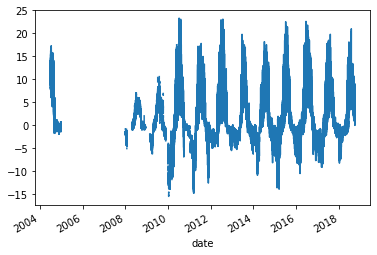

In [17]:
newdf['loc1_10_cm'].plot()

Print df information before dropping NaNs...

In [18]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577282 entries, 2004-07-02 12:00:00 to 2018-09-30 23:30:00
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   site        577279 non-null  object 
 1   loc1_10_cm  435083 non-null  float64
 2   loc1_20_cm  534124 non-null  float64
 3   loc1_30cm   534124 non-null  float64
 4   loc1_40cm   533676 non-null  float64
 5   loc2_10cm   475582 non-null  float64
 6   loc2_20cm   525427 non-null  float64
 7   loc2_30cm   533318 non-null  float64
 8   loc2_40cm   532870 non-null  float64
 9   loc3_5cm    376465 non-null  float64
 10  loc3_10cm   527540 non-null  float64
 11  loc3_20cm   535928 non-null  float64
 12  loc3_30cm   534100 non-null  float64
 13  loc3_40cm   533558 non-null  float64
dtypes: float64(13), object(1)
memory usage: 66.1+ MB


In [19]:
# change 'date' to index and now you drop the NaN rows 
print(newdf.shape)
newdf1=newdf.dropna()
newdf1.shape

(577282, 14)


(374303, 14)

In [20]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374303 entries, 2010-08-08 19:30:00 to 2018-09-30 23:30:00
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   site        374303 non-null  object 
 1   loc1_10_cm  374303 non-null  float64
 2   loc1_20_cm  374303 non-null  float64
 3   loc1_30cm   374303 non-null  float64
 4   loc1_40cm   374303 non-null  float64
 5   loc2_10cm   374303 non-null  float64
 6   loc2_20cm   374303 non-null  float64
 7   loc2_30cm   374303 non-null  float64
 8   loc2_40cm   374303 non-null  float64
 9   loc3_5cm    374303 non-null  float64
 10  loc3_10cm   374303 non-null  float64
 11  loc3_20cm   374303 non-null  float64
 12  loc3_30cm   374303 non-null  float64
 13  loc3_40cm   374303 non-null  float64
dtypes: float64(13), object(1)
memory usage: 42.8+ MB


#### Compare the two dataframes by plotting the soil temp at 10cm for both the dataset containing NaNs and the one without...

Without NaNs..note when dropping all NaNs, you are left with 8 years of data, instead of 14..

<AxesSubplot:xlabel='date'>

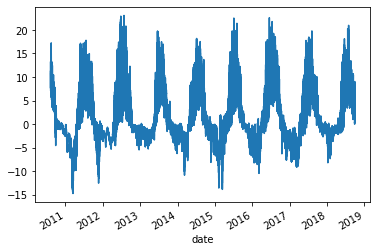

In [22]:
newdf1['loc1_10_cm'].plot()

With NaNs...

<AxesSubplot:xlabel='date'>

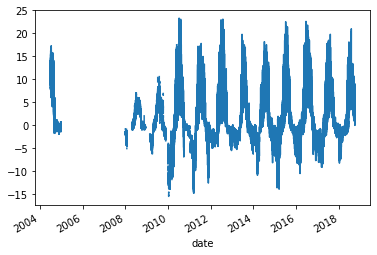

In [23]:
newdf['loc1_10_cm'].plot()

### Apply FFT (fast furier trasform analyze the spikes times)

In [24]:
import scipy.fft
import quandl
import dill
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [25]:

temp=newdf1['loc1_20_cm'].to_frame()
temp.head()

,loc1_20_cm
date,
2010-08-08 19:30:00,8.94
2010-08-08 20:00:00,8.92
2010-08-08 20:30:00,8.90
2010-08-08 21:00:00,8.81
2010-08-08 21:30:00,8.78


In [26]:
df.loc1_20_cm.mean()

0.4658110730593678

In [27]:
df.loc1_20_cm - df.loc1_20_cm.mean()


0        0.164189
1        0.164189
2        0.184189
3        0.164189
4        0.144189
           ...   
17515    0.464189
17516    0.464189
17517    0.444189
17518    0.354189
17519    0.344189
Name: loc1_20_cm, Length: 17520, dtype: float64

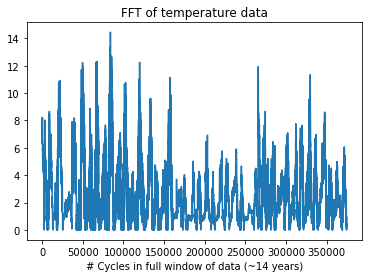

In [28]:
fft = scipy.fft.fft((temp - temp.mean()).values)
plt.plot(np.abs(fft))
plt.title("FFT of temperature data")
plt.xlabel('# Cycles in full window of data (~14 years)');

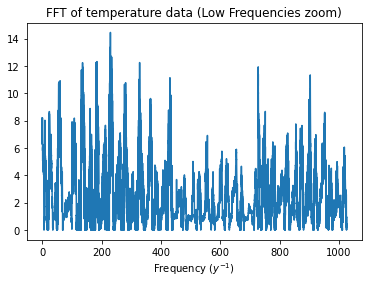

In [29]:
plt.plot(1./365 * np.arange(len(fft)), np.abs(fft))
plt.title("FFT of temperature data (Low Frequencies zoom)")
#plt.xlim([0,10000])
plt.xlabel('Frequency ($y^{-1}$)');

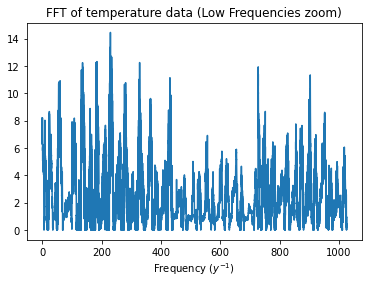

In [30]:
plt.plot(1./365 * np.arange(len(fft)), np.abs(fft))
plt.title("FFT of temperature data (Low Frequencies zoom)")
#plt.xlim([0,10000])
plt.xlabel('Frequency ($y^{-1}$)');

In [31]:
temp=temp['loc1_20_cm']

After cleaning,merging the data, and re-indexing, we can now export the final concatenated csv file which contains only half-hourly soil moisture data from 2004-2018

In [32]:

newdf1.to_csv('AK_EML_LTER_GradientSoil_noNaN_2004_2018.csv',index=True)
newdf.to_csv('AK_EML_LTER_GradientSoil_2004_2018.csv',index=True)


KeyboardInterrupt: 